In [1]:
import torch
a = torch.tensor([1, 3, 5, 7])
b = torch.tensor([2, 4, 6, 8])
print(a.T)
print(a)
# Merge tensors using torch.cat
result_tensor = torch.cat((a, b), dim=0)
print(torch.stack((a,b)))
stack_ed = torch.flatten(torch.stack((a, b), dim=1))
print(stack_ed)

tensor([1, 3, 5, 7])
tensor([1, 3, 5, 7])
tensor([[1, 3, 5, 7],
        [2, 4, 6, 8]])
tensor([1, 2, 3, 4, 5, 6, 7, 8])


/tmp/ipykernel_6239/2054669105.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  print(a.T)


In [2]:
import torch

# Example tensor
tensor = torch.tensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])

# Dimension to shift along
dim = 1

# Shift all values along dimension 'dim' by 1
shifted_tensor = torch.cat([tensor[:, 1:], tensor[:, :1]], dim=dim)
shifted_tensor1 = torch.cat([tensor[-1:, :], tensor[:-1, :]], dim=0) # 1 and -1 shift achieve shift to left and right


print("Original tensor:")
print(tensor)

print("\nShifted tensor along dimension {}: ".format(dim))
print(shifted_tensor)


Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Shifted tensor along dimension 1: 
tensor([[2, 3, 1],
        [5, 6, 4],
        [8, 9, 7]])


In [3]:
expansion = torch.tile(a,(3,))
print(a[:2])
print(expansion)

tensor([1, 3])
tensor([1, 3, 5, 7, 1, 3, 5, 7, 1, 3, 5, 7])


In [4]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    # Resize to have the shortest edge be 224, maintaining aspect ratio
    transforms.Resize(size=(224, 224)),

    # Randomly crop a 224x224 region (87.5% of the image)
    transforms.RandomResizedCrop(size=224, scale=(0.875, 1.0), ratio=(1.0, 1.0)),

    # Rescale pixel values to [0, 1]
    transforms.ToTensor(),

    # Normalize using the specified mean and standard deviation
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

ImportError: cannot import name 'ConvNeXTV2Config' from 'transformers' (/home/niklas/anaconda3/lib/python3.11/site-packages/transformers/__init__.py)

In [5]:
from transformers import AutoImageProcessor, ConvNextV2ForImageClassification,ConvNextV2Config
import tensorboard
from torch.utils.tensorboard import SummaryWriter
import torchvision
import transformers


import torch
from datasets import load_dataset
temp = SummaryWriter()
dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
#trainloader = torch.utils.data.DataLoader(images, batch_size = 2, shuffle=True)
#image, labels =next(iter(trainloader))
image_processor = AutoImageProcessor.from_pretrained("facebook/convnextv2-tiny-1k-224")
model = ConvNextV2ForImageClassification.from_pretrained("facebook/convnextv2-tiny-1k-224")
dummy_input = image
#writer.add_graph(image_processor, image)

#model.layernorm = nn.LayerNorm((768,), eps=1e-12, elementwise_affine=True)

inputs = image_processor(image, return_tensors="pt")
print(type(inputs["pixel_values"]))
print(inputs["pixel_values"].shape)



with torch.no_grad():

    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes

predicted_label = logits.argmax(-1).item()
    

    #temp.add_graph(model, inputs["pixel_values"], use_strict_trace=False)
    #temp.add_graph(model, inputs["input_values"])

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(predicted_label)
#grid = torchvision.utils.make_grid(image)
#writer.add_image('images', grid, 0)

temp.close()
print(model.config.id2label[predicted_label])

/home/niklas/anaconda3/lib/python3.11/site-packages/datasets/load.py:1454: FutureWarning: The repository for huggingface/cats-image contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/huggingface/cats-image
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])
281
tabby, tabby cat


In [8]:
import torch 
from torch import nn
class Wrapp(nn.Module):
    
    def __init__(self, in_channels=3, num_classes=1000):
        super(Wrapp, self).__
        init__()
        self.tokenizer = AutoImageProcessor.from_pretrained("facebook/convnextv2-tiny-1k-224")
        self.convnext2 = ConvNextV2ForImageClassification.from_pretrained("facebook/convnextv2-tiny-1k-224")
    def forward(self, x):
        x = self.tokenizer(x, return_tensors="pt")
        x = self.convnext2(**x)
        x = x.logits
        print(type(x))
        print(dir(x))
        return x

In [24]:
import torch 
from torch import nn
class WrappMnist(nn.Module):
    
    def __init__(self, in_channels=1, num_classes=10):
        super(WrappMnist, self).__init__()
        self.tokenizer = AutoImageProcessor.from_pretrained("facebook/convnextv2-tiny-1k-224", do_normalize=False)
        self.convnext2 = ConvNextV2ForImageClassification.from_pretrained("facebook/convnextv2-tiny-1k-224")
        config = ConvNextV2Config.from_pretrained("facebook/convnextv2-tiny-1k-224")
        config.num_channels = 1 
        convnext2 = ConvNextV2ForImageClassification(config)
        #convnext2.classifier = nn.Linear(in_channels=3072, out_channels=10)
        self.convnext2 = convnext2
        
        
        
    def forward(self, x):
        x = self.tokenizer(x, return_tensors="pt")
       
        x = self.convnext2(**x)
        x = x.logits
     
        return x
    

In [35]:
"""
A simple walkthrough of how to code a convolutional neural network (CNN)
using the PyTorch library. For demonstration we train it on the very
common MNIST dataset of handwritten digits. In this code we go through
how to create the network as well as initialize a loss function, optimizer,
check accuracy and more.

Programmed by Aladdin Persson
* 2020-04-08: Initial coding
* 2021-03-24: More detailed comments and small revision of the code
* 2022-12-19: Small revision of code, checked that it works with latest PyTorch version

"""

# Imports
import torch

from torchvision.transforms import v2 
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import (
    DataLoader,
)  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
import tensorboard
from torch.utils.tensorboard import SummaryWriter
# Simple CNN



# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
writer = SummaryWriter()
# Hyperparameters
in_channels = 1
num_classes = 10
learning_rate = 3e-4 # karpathy's constant
batch_size = 4
num_epochs = 3

# Load Data
train_dataset = datasets.MNIST(
    root="dataset/", train=True, transform=transforms.ToTensor(), download=True
)
test_dataset = datasets.MNIST(
    root="dataset/", train=False, transform=transforms.ToTensor(), download=True
)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

# Initialize network
model = WrappMnist()
for name, param in model.named_parameters():
    print(name)
param_device = next(model.parameters()).device
print(param_device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# visualizationdataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

transform = transforms.Compose([
    transforms.ToTensor(),
])

# Apply the transformation to the image
tensor_image = transform(image)

# If you need to add a batch dimension (1 for single image)
tensor_image = tensor_image.unsqueeze(0)

# Now, tensor_image is a PyTorch tensor representing the JPEG image
print(tensor_image.shape)

dummy_input = tensor_image
data = dummy_input
#writer.add_graph(model,dummy_input)
data = data.to(device=device)
targets = torch.zeros(1)
targets[0] = 2
targets = targets.long()
targets = targets.to(device=device)
scores = model(data)
scores = scores.to(device=device)
loss = criterion(scores, targets)

        # backward
optimizer.zero_grad()
loss.backward()

        # gradient descent or adam step
optimizer.step()


convnext2.convnextv2.embeddings.patch_embeddings.weight
convnext2.convnextv2.embeddings.patch_embeddings.bias
convnext2.convnextv2.embeddings.layernorm.weight
convnext2.convnextv2.embeddings.layernorm.bias
convnext2.convnextv2.encoder.stages.0.layers.0.dwconv.weight
convnext2.convnextv2.encoder.stages.0.layers.0.dwconv.bias
convnext2.convnextv2.encoder.stages.0.layers.0.layernorm.weight
convnext2.convnextv2.encoder.stages.0.layers.0.layernorm.bias
convnext2.convnextv2.encoder.stages.0.layers.0.pwconv1.weight
convnext2.convnextv2.encoder.stages.0.layers.0.pwconv1.bias
convnext2.convnextv2.encoder.stages.0.layers.0.grn.weight
convnext2.convnextv2.encoder.stages.0.layers.0.grn.bias
convnext2.convnextv2.encoder.stages.0.layers.0.pwconv2.weight
convnext2.convnextv2.encoder.stages.0.layers.0.pwconv2.bias
convnext2.convnextv2.encoder.stages.0.layers.1.dwconv.weight
convnext2.convnextv2.encoder.stages.0.layers.1.dwconv.bias
convnext2.convnextv2.encoder.stages.0.layers.1.layernorm.weight
convne

ValueError: Make sure that the channel dimension of the pixel values match with the one set in the configuration.

In [28]:
# Train Network
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
        # Get data to cuda if possible
        print(data.shape)
        break
       
        if(data.shape[1] == 1):
            data = torch.tile(data, (1,1,1,1))
        
        

        # forward
       
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        scores = model(data)
        loss = criterion(scores, targets)

        # backward
        optimizer.zero_grad()
        loss.backward()

        # gradient descent or adam step
        optimizer.step()
        print("worked")
    break


# Check accuracy on training & test to see how good our model
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    model.train()
    return num_correct / num_samples


print(f"Accuracy on training set: {check_accuracy(train_loader, model)*100:.2f}")
print(f"Accuracy on test set: {check_accuracy(test_loader, model)*100:.2f}")

  0%|          | 0/15000 [00:00<?, ?it/s]

torch.Size([4, 1, 28, 28])


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [23]:
from transformers import AutoImageProcessor, ConvNextV2ForImageClassification,ConvNextV2Config
import tensorboard
from torch.utils.tensorboard import SummaryWriter
import torchvision
import transformers


import torch
from datasets import load_dataset
temp = SummaryWriter()
t = ConvNextV2ForImageClassification.from_pretrained("facebook/convnextv2-tiny-1k-224")
config = ConvNextV2Config.from_pretrained("facebook/convnextv2-tiny-1k-224")
config.num_channels = 1 
model= ConvNextV2ForImageClassification(config)

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
model = Wrapp()
output = model(image)

# model predicts one of the 1000 ImageNet classes

predicted_label = output.argmax(-1).item()

print(predicted_label)



AttributeError: 'super' object has no attribute '__'

In [ ]:
print(image_processor)

In [ ]:

image_processor = AutoImageProcessor.from_pretrained("facebook/convnextv2-tiny-1k-224")
image_processor.normalize?

In [ ]:
print(dir(ConvNextV2ForImageClassification))

In [1]:
#subprocess.run(["ls", "-a"], capture_output=True, std_out=PIPE)
def make_executable(script_path):
    try:
        # Add execute permissions to the script
        os.chmod(script_path, os.stat(script_path).st_mode | 0o111)
        print(f"Successfully made '{script_path}' executable.")
    except OSError as e:
        print(f"Error making '{script_path}' executable: {e}")

In [3]:
import subprocess
from subprocess import PIPE
import os
p1 = subprocess.Popen(["ls","-a"], stdout=PIPE)
p2 = subprocess.Popen(["grep", "ipynb"], stdin=p1.stdout, stdout=PIPE)
p1.stdout.close()  # Allow p1 to receive a SIGPIPE if p2 exits.
output = p2.communicate()[0]
print(output)
script_lines = [
    "#!/bin/bash",
    "#SBATCH --nodes=1",
    "#SBATCH --cpus-per-task=2",
    "#SBATCH --time=2:00",
    "#SBATCH --mem=20000mb",
    "",
    "module load devel/cuda/11.8",
    "module load devel/miniconda/23.9.0-py3.9.15",
    "module load devel/python/3.11.7_intel_2021.4.0",
    "module load devel/cudnn/9.2",
    "# cd foldername von venv",
    "cd UniDG",
    "# source venv/bin/activate"
]
algorithms = ["CORAL","Mixup","ERM","Inter_domain_adaptation"]
test_environments = [0,1,2,3]
backbones = ["resnet50", "ConvNext"]
adapt_algorithm ="T3A"

command_firstpart = "python -m domainbed.scripts.train       --data_dir=./data     --dataset TerraIncognita"

adapt = False


for algorithm in algorithms:
    for test_env in test_environments:
        for backbone in backbones:
            if adapt== True:
                path = "TAdapt_{algorithm}{test_env}{backbone}.sh".format(algorithm=algorithm,backbone=backbone,test_env=test_env)
                
            else:
                path = "T{algorithm}{test_env}{backbone}.sh".format(algorithm=algorithm,backbone=backbone,test_env=test_env)
                
            
            
            try:
                with open(path,'a') as file:
                    for line in script_lines:
                        file.write(line + '\n')

                    if adapt == True:
                        unsupervised_adaptation = "python -m domainbed.scripts.unsupervised_adaptation        --input_dir my/pretrain/{algorithm}/TerraIncognita/{backbone}/{test_env}       --adapt_algorithm={adapt_algorithm}".format(algorithm=algorithm,backbone=backbone,test_env=test_env,adapt_algorithm=adapt_algorithm)
                        command = unsupervised_adaptation
                    else:
                        command_secondpart = '  --algorithm {algorithm}        --test_env {test_env} --hparams "{{\\"backbone\\": \\"{backbone}\\"}}"     --output_dir my/pretrain/{algorithm}/TerraIncognita/{backbone}/{test_env}'.format(algorithm=algorithm, backbone=backbone, test_env = test_env)
                        command = command_firstpart+command_secondpart
                        
                        
                    
                    file.write(command)
                    os.utime(path)
            except Exception as e:
                print(f"Error touching file '{filename}': {e}")
            make_executable(path)


    







b'Domain_generalization_experiments.ipynb\n.ipynb_checkpoints\n'
Successfully made 'TDANN0resnet50.sh' executable.
Successfully made 'TDANN0ConvNext.sh' executable.
Successfully made 'TDANN1resnet50.sh' executable.
Successfully made 'TDANN1ConvNext.sh' executable.
Successfully made 'TDANN2resnet50.sh' executable.
Successfully made 'TDANN2ConvNext.sh' executable.
Successfully made 'TDANN3resnet50.sh' executable.
Successfully made 'TDANN3ConvNext.sh' executable.


In [30]:
# calculation of the unsupervised adaptation results
import pandas as pd
filepath = "/home/niklas/Desktop/results.csv"
types = ["in_acc","in_ent", "out_acc", "out_ent" ]
columns = []
for i in range(4):
    for t in types:
        column_name = "env{env}_{t}".format(env=i, t=t)
        print(column_name)
        columns.append(column_name)

names = ["test_env", "backbone", "dataset", "h1", *columns, "filter_K", "gamma", "lambd"]
print(names)
df = pd.read_csv(filepath, names = names)
data = df.drop(["h1", "filter_K", "gamma", "lambd"], axis=1)
print(data)

data["test_in_acc"] = data.apply(lambda row: row[f'env{row["test_env"]}_in_acc'], axis=1)
data["test_out_acc"] =data.apply(lambda row: row[f'env{row["test_env"]}_out_acc'], axis=1)
print(data["test_in_acc"])
print(data["test_out_acc"])

grouped = data.groupby(["backbone", "dataset"])

print(grouped["test_in_acc"].mean())
print(grouped["test_out_acc"].mean())


env0_in_acc
env0_in_ent
env0_out_acc
env0_out_ent
env1_in_acc
env1_in_ent
env1_out_acc
env1_out_ent
env2_in_acc
env2_in_ent
env2_out_acc
env2_out_ent
env3_in_acc
env3_in_ent
env3_out_acc
env3_out_ent
['test_env', 'backbone', 'dataset', 'h1', 'env0_in_acc', 'env0_in_ent', 'env0_out_acc', 'env0_out_ent', 'env1_in_acc', 'env1_in_ent', 'env1_out_acc', 'env1_out_ent', 'env2_in_acc', 'env2_in_ent', 'env2_out_acc', 'env2_out_ent', 'env3_in_acc', 'env3_in_ent', 'env3_out_acc', 'env3_out_ent', 'filter_K', 'gamma', 'lambd']
   test_env  backbone          dataset  env0_in_acc   env0_in_ent  \
0         1  ConvNext  TerraIncongnita     0.898761  1.449553e-02   
1         1  resnet50   TerraIncognita     0.603744  2.884490e-02   
2         2  resnet50   TerraIncognita     0.672291  2.700609e-02   
3         3  resnet50   TerraIncognita     0.354073  3.222888e-02   
4         0  resnet50   TerraIncognita     0.202742  2.459363e-09   
5         3  ConvNext   TerraIncognita     0.621408  7.235391e-03 

In [32]:
#testing of base results
filepath = "/home/niklas/Desktop/base_results.csv"
types = ["in_acc","in_ent", "out_acc", "out_ent" ]
columns = []
for i in range(4):
    for t in types:
        column_name = "env{env}_{t}".format(env=i, t=t)
        print(column_name)
        columns.append(column_name)

names = ["test_env", "backbone", "dataset", *columns]
print(names)
df = pd.read_csv(filepath, names = names)
data = df
print(data)

data["test_in_acc"] = data.apply(lambda row: row[f'env{row["test_env"]}_in_acc'], axis=1)
data["test_out_acc"] =data.apply(lambda row: row[f'env{row["test_env"]}_out_acc'], axis=1)
print(data["test_in_acc"])
print(data["test_out_acc"])

grouped = data.groupby(["backbone", "dataset"])

print(grouped["test_in_acc"].mean())
print(grouped["test_out_acc"].mean())

env0_in_acc
env0_in_ent
env0_out_acc
env0_out_ent
env1_in_acc
env1_in_ent
env1_out_acc
env1_out_ent
env2_in_acc
env2_in_ent
env2_out_acc
env2_out_ent
env3_in_acc
env3_in_ent
env3_out_acc
env3_out_ent
['test_env', 'backbone', 'dataset', 'env0_in_acc', 'env0_in_ent', 'env0_out_acc', 'env0_out_ent', 'env1_in_acc', 'env1_in_ent', 'env1_out_acc', 'env1_out_ent', 'env2_in_acc', 'env2_in_ent', 'env2_out_acc', 'env2_out_ent', 'env3_in_acc', 'env3_in_ent', 'env3_out_acc', 'env3_out_ent']
   test_env  backbone          dataset  env0_in_acc  env0_in_ent  \
0         1  resnet50   TerraIncognita     0.979699     0.075036   
1         2  ConvNext   TerraIncognita     0.988136     0.024928   
2         3  ConvNext   TerraIncognita     0.986554     0.030286   
3         0  ConvNext  TerraIncongnita     0.631426     0.543387   
4         2  resnet50   TerraIncognita     0.971526     0.105339   
5         3  resnet50   TerraIncognita     0.976008     0.082380   
6         0  resnet50   TerraIncognita  

In [16]:
#create tables for latex 
import pandas as pd
import numpy as np
algorithms = ["CORAL","Mixup","ERM","Inter_domain_adaptation"]
algorithms_positive = ["ERM-Reference", "SWAD", "SIMPLE", "UniDG"]
backbones = ["resnet50", "ConvNext","Ensemble"]
data_ERM = [42.25,58.3,None]
data_SWAD = [50.786,None,None]
data_SIMPLE = [None,None,46.49]
data_UniDG = [55.00,64.52,None]
data_comparison = data_ERM,data_SWAD, data_SIMPLE, data_UniDG
data_comparison = np.array(data_comparison)

base_values = pd.DataFrame(data= data_comparison.T,columns=algorithms_positive)
base_values.index = backbones
print(base_values)
base_values.to_csv('out.csv')


         ERM-Reference    SWAD SIMPLE  UniDG
resnet50         42.25  50.786   None   55.0
ConvNext          58.3    None   None  64.52
Ensemble          None    None  46.49   None


In [3]:
import pandas as pd
import numpy as np
algorithms = ["ERM","CORAL","Mixup","DANN"]
backbones = ["resnet50", "ConvNext"]
data_ERM = [42.25,58.3]
data_CORAL = [46.03,59.04]
data_Mixup = [47.04,60.06]
data_DANN = [20.48,56.36]
data_base = data_ERM,data_CORAL,data_Mixup, data_DANN
data_base = np.array(data_base)
base_values = pd.DataFrame(data= data_base.T, columns=algorithms)
base_values.index = backbones
print(base_values)
base_values.to_csv('baseResultsDomainBed.csv')

            ERM  CORAL  Mixup   DANN
resnet50  42.25  46.03  47.04  20.48
ConvNext  58.30  59.04  60.06  56.36


Index(['Adapt_Algorithm', 'backbone', 'algorithm', 'testenv', 'results'], dtype='object')


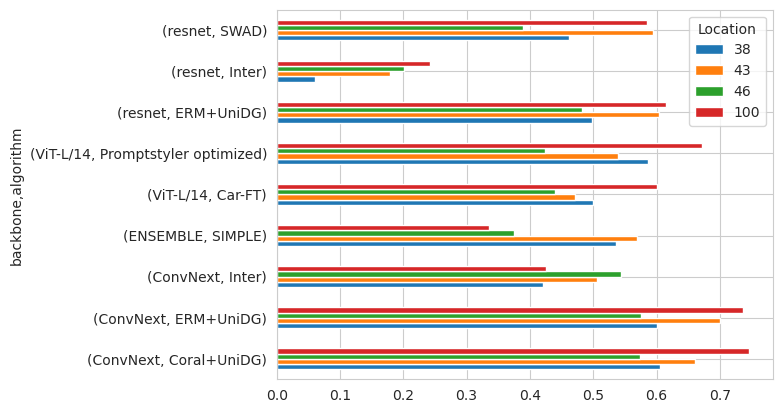

In [1]:
# bar diagrams of the results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
columns = ["adaptation_algorithm","base_algorithm", "backbone","testenv"]
excel_file = "results_combined.xlsx"

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(excel_file,sheet_name=1)
print(df.columns)
locations = {0:100, 1:38, 2:43,3:46}# 38 43 46 100 
df["Location"]= df["testenv"].map(locations)

options=["SIMPLE","SWAD","Inter","Promptstyler optimized", "Car-FT","Coral+UniDG","ERM+UniDG"]

Implemented_algorithm = df.loc[df["algorithm"].isin(options)]

grouped_df = Implemented_algorithm.groupby(["backbone", "algorithm", "Adapt_Algorithm", "Location"]).mean().reset_index()
sns.set_style("whitegrid")
# Plotting grouped bar chart
grouped_df.pivot_table(index=['backbone', 'algorithm'], columns='Location', values='results').plot(kind='barh')

# Show the plot
plt.show()

Index(['Adapt_Algorithm', 'backbone', 'algorithm', 'testenv', 'results'], dtype='object')


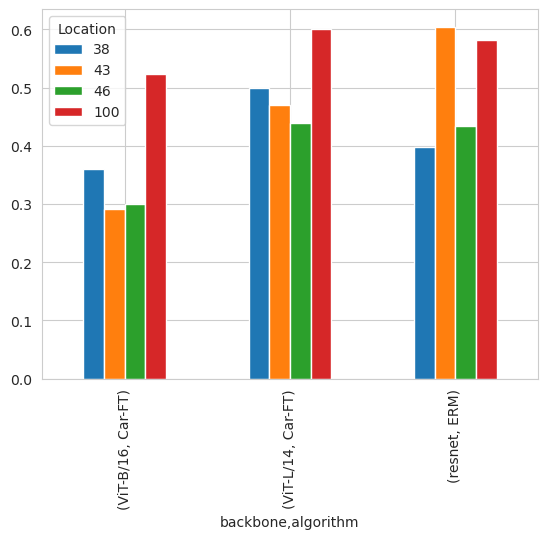

In [7]:
# bar diagrams of the results
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
columns = ["adaptation_algorithm","base_algorithm", "backbone","testenv"]
excel_file = "results_combined.xlsx"

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(excel_file,sheet_name=1)
print(df.columns)
locations = {0:100, 1:38, 2:43,3:46}# 38 43 46 100 
df["Location"]= df["testenv"].map(locations)

options=["Car-FT","ERM"]
backbones = ["resnet", "ViT-L/14", "ViT-B/16"]
Robins_algorithm = df.loc[df["algorithm"].isin(options)]
Implemented_algorithm = Robins_algorithm.loc[Robins_algorithm["backbone"].isin(backbones)]

grouped_df = Implemented_algorithm.groupby(["backbone", "algorithm", "Adapt_Algorithm", "Location"]).mean().reset_index()
sns.set_style("whitegrid")
# Plotting grouped bar chart
grouped_df.pivot_table(index=['backbone', 'algorithm'], columns='Location', values='results').plot(kind='bar')

# Show the plot
plt.show()

   Adapt_Algorithm backbone algorithm  testenv  results  Location
4               NO   resnet       ERM        0  0.45000       100
5               NO   resnet       ERM        1  0.33100        38
6               NO   resnet       ERM        2  0.57200        43
7               NO   resnet       ERM        3  0.33700        46
68              NO   resnet      SWAD        0  0.58450       100
69              NO   resnet      SWAD        1  0.46120        38
70              NO   resnet      SWAD        2  0.59446        43
71              NO   resnet      SWAD        3  0.38836        46


<Axes: xlabel='backbone,algorithm'>

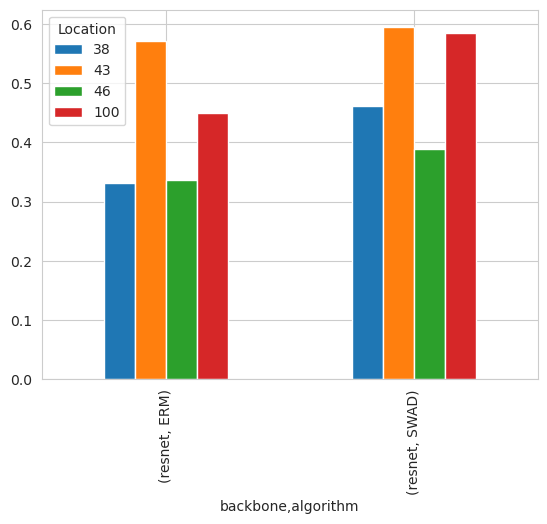

In [6]:
options = ["ERM", "SWAD"]
backbones = ['resnet']
unsupervised_adaptations = ["NO"]
df_unsupervised = df.loc[df.Adapt_Algorithm.isin(unsupervised_adaptations)]
ERM_SWAD_Algorithms = df_unsupervised.loc[df_unsupervised.algorithm.isin(options)]
ERM_SWAD_Comparison = ERM_SWAD_Algorithms.loc[ERM_SWAD_Algorithms.backbone.isin(backbones)]

print(ERM_SWAD_Comparison)
grouped_df = ERM_SWAD_Comparison.groupby(["backbone", "algorithm", "Adapt_Algorithm", "Location"]).mean().reset_index()
sns.set_style("whitegrid")
# Plotting grouped bar chart
grouped_df.pivot_table(index=['backbone', 'algorithm'], columns='Location', values='results').plot(kind='bar')

   Adapt_Algorithm  backbone  algorithm  testenv  results  Location
4               NO    resnet        ERM        0   0.4500       100
5               NO    resnet        ERM        1   0.3310        38
6               NO    resnet        ERM        2   0.5720        43
7               NO    resnet        ERM        3   0.3370        46
16              NO  ConvNext        ERM        0   0.6269       100
17              NO  ConvNext        ERM        1   0.5040        38
18              NO  ConvNext        ERM        2   0.6751        43
19              NO  ConvNext        ERM        3   0.5260        46
44           UniDG    resnet  ERM+UniDG        0   0.6150       100
45           UniDG    resnet  ERM+UniDG        1   0.4982        38
46           UniDG    resnet  ERM+UniDG        2   0.6044        43
47           UniDG    resnet  ERM+UniDG        3   0.4823        46
48           UniDG  ConvNext  ERM+UniDG        0   0.7361       100
49           UniDG  ConvNext  ERM+UniDG        1

<Axes: xlabel='backbone,algorithm'>

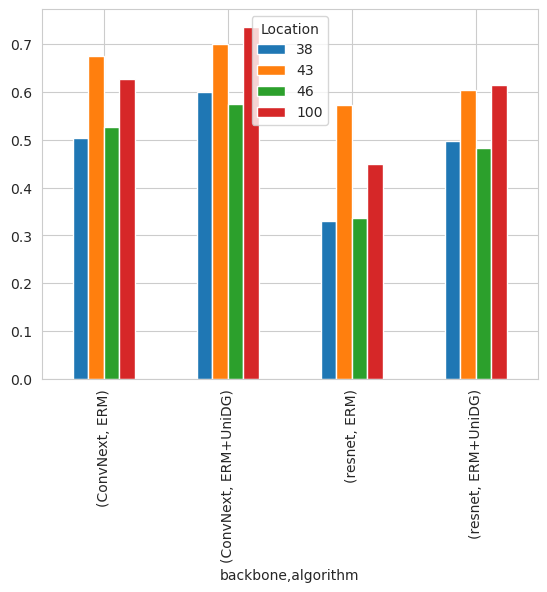

In [10]:

options = ["ERM","ERM+UniDG" ]
backbones = ['resnet','ConvNext']

df_unsupervised = df.loc[df.Adapt_Algorithm.isin(unsupervised_adaptations)]
ERM_SWAD_Algorithms = df_unsupervised.loc[df_unsupervised.algorithm.isin(options)]
ERM_SWAD_Comparison = ERM_SWAD_Algorithms.loc[ERM_SWAD_Algorithms.backbone.isin(backbones)]

print(ERM_SWAD_Comparison)
grouped_df = ERM_SWAD_Comparison.groupby(["backbone", "algorithm", "Adapt_Algorithm", "Location"]).mean().reset_index()
sns.set_style("whitegrid")
# Plotting grouped bar chart
grouped_df.pivot_table(index=['backbone', 'algorithm'], columns='Location', values='results').plot(kind='bar')

0    0.646600
1    0.652900
2    0.549975
Name: results, dtype: float64


<Axes: xlabel='Adapt_Algorithm,backbone,algorithm'>

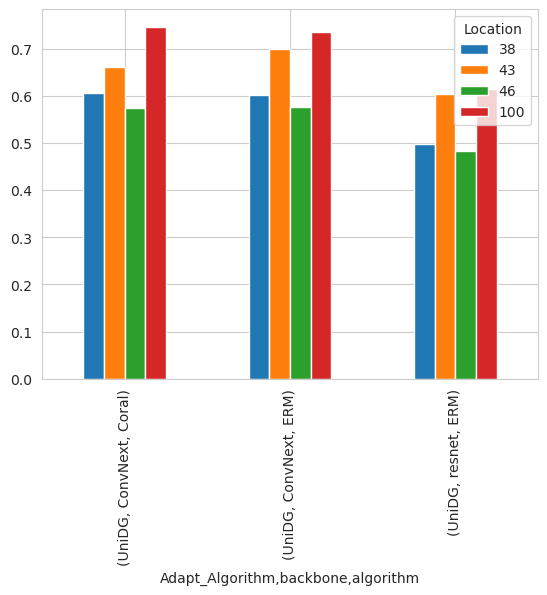

In [48]:
options = ["SWAD","SIMPLE","Inter"]
Implemented_algorithm = df.loc[df["algorithm"].isin(options)]
adapted = ["T3A","UniDG"]
condition = df["Adapt_Algorithm"] == ("UniDG" or "T3A") 
adapted_part = df[condition]
non_adapted_part = df[~condition]
non_adapted_part.drop(["Adapt_Algorithm"], axis = 1)
accuracies_adapted = adapted_part.groupby(["backbone", "algorithm", "Adapt_Algorithm"]).mean().reset_index()
print(accuracies_adapted['results'])
adapted_df = adapted_part.groupby(["backbone", "algorithm", "Adapt_Algorithm", "Location"]).mean().reset_index()

adapted_df.pivot_table(index=['Adapt_Algorithm','backbone', 'algorithm'], columns='Location', values='results').plot(kind='bar')

In [42]:
print(non_adapted_part.head(10))

  Adapt_Algorithm  backbone algorithm  testenv  results  Location
0              NO  ConvNext     Inter        0   0.4250       100
1              NO  ConvNext     Inter        3   0.5435        46
2              NO  ConvNext     Inter        2   0.5056        43
3              NO  ConvNext     Inter        1   0.4200        38
4              NO    resnet       ERM        0   0.4500       100
5              NO    resnet       ERM        1   0.3310        38
6              NO    resnet       ERM        2   0.5720        43
7              NO    resnet       ERM        3   0.3370        46
8              NO    resnet     mixup        0   0.5637       100
9              NO    resnet     mixup        1   0.4363        38


100%|██████████| 9912422/9912422 [00:04<00:00, 2153273.87it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 112412.90it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1430661.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20331407.44it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



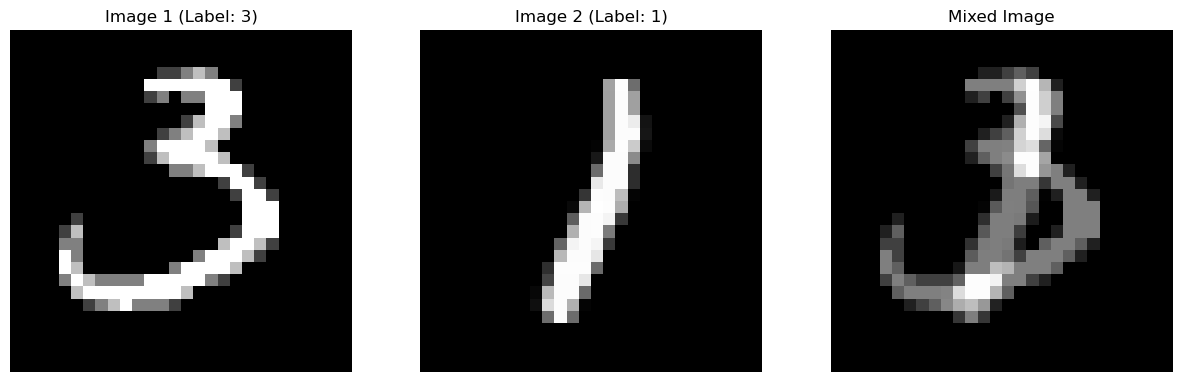

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Load Colored MNIST dataset
colored_mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Lambda(lambda x: x.repeat(3, 1, 1))]), download=True)

# Choose two random images
idx1 = np.random.randint(0, len(colored_mnist_train))
idx2 = np.random.randint(0, len(colored_mnist_train))

# Get the images and labels
img1, label1 = colored_mnist_train[idx1]
img2, label2 = colored_mnist_train[idx2]

# Convert images to numpy arrays
img1_np = img1.numpy().transpose((1, 2, 0))  # Convert from (C, H, W) to (H, W, C)
img2_np = img2.numpy().transpose((1, 2, 0))

# Mixup parameter (lambda)
lambda_val = 0.5  # You can adjust this value

# Overlay the images using Mixup
mixed_img_np = lambda_val * img1_np + (1 - lambda_val) * img2_np

# Visualize the original images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1_np)
plt.title(f"Image 1 (Label: {label1})")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2_np)
plt.title(f"Image 2 (Label: {label2})")
plt.axis('off')

# Visualize the mixed image
plt.subplot(1, 3, 3)
plt.imshow(mixed_img_np)
plt.title("Mixed Image")
plt.axis('off')

plt.show()
